# 1.Import Library and Pickle

In [1]:
# Import library
import pandas as pd
import numpy as np
import os

In [2]:
# Import pickle
ords_prods_merge= pd.read_pickle(r'C:\Users\william\5-2023 Instacart Basket Analysis\Data\Prepared Data\orders_products_merged_updated_again.pkl')

# 2. Aggregate Mean of Entire Dataframe

In [3]:
# Aggregation
ords_prods_merge.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457687
2,17.277920
3,17.179756
4,17.811403
5,15.213779
6,16.439806
7,17.225773
8,15.340520


# 3. Analyze Results Compared to Subset Results

#### When analyzing the whole dataframe compared to the subset, the results from the entire dataframe show all department IDs. In addition, the means are not the same when comparing the results from each aggregation.

# 4. Creating a Loyalty Flag

In [4]:
# Creating a flag
ords_prods_merge['max_order'] = ords_prods_merge.groupby(['user_id'])['order_number'].transform(np.max)

In [5]:
# Check
ords_prods_merge.head(15)

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,...,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer
1,1,2398795,1,2,3,7,15.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer
2,2,473747,1,3,3,12,21.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer
3,3,2254736,1,4,4,7,29.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer
4,4,431534,1,5,4,15,28.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer
5,5,3367565,1,6,2,7,19.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer
6,6,550135,1,7,1,9,20.0,196,1,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
7,7,3108588,1,8,1,14,14.0,196,2,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
8,8,2295261,1,9,1,16,0.0,196,4,1,...,77,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer
9,9,2550362,1,10,4,8,30.0,196,1,1,...,77,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer


In [6]:
ords_prods_merge['loyalty_flag'].value_counts(dropna=False)

Regular customer    15891077
Loyal customer      10293737
New customer         6249398
Name: loyalty_flag, dtype: int64

#### I realized I already created the flag system in my exercise so no need to actually execute the code again. But this is what I used previously

ords_prods_merge.loc[ords_prods_merge['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

ords_prods_merge.loc[(ords_prods_merge['max_order'] <= 40) & (ords_prods_merge['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

ords_prods_merge.loc[ords_prods_merge['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

# 5. Mean Pricing for Customers

In [7]:
# Grouping
ords_prods_merge.groupby('prices')

In [8]:
# Aggregating prices through the "loyalty_flag" column
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean']})

,prices
,mean
loyalty_flag,
Loyal customer,10.388747
New customer,13.294370
Regular customer,12.496203


# 6. Targeting Different Types of Spenders

In [9]:
# Creating mean order group
ords_prods_merge['mean_order'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

In [10]:
# Check
ords_prods_merge.head(15)

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,...,department_id,prices,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order
0,0,2539329,1,1,2,8,NaN,196,1,0,...,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
1,1,2398795,1,2,3,7,15.0,196,1,1,...,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797
2,2,473747,1,3,3,12,21.0,196,1,1,...,7,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797
3,3,2254736,1,4,4,7,29.0,196,1,1,...,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797
4,4,431534,1,5,4,15,28.0,196,1,1,...,7,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797
5,5,3367565,1,6,2,7,19.0,196,1,1,...,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797
6,6,550135,1,7,1,9,20.0,196,1,1,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797
7,7,3108588,1,8,1,14,14.0,196,2,1,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797
8,8,2295261,1,9,1,16,0.0,196,4,1,...,7,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797
9,9,2550362,1,10,4,8,30.0,196,1,1,...,7,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797


In [11]:
# Creating flags
ords_prods_merge.loc[ords_prods_merge['mean_order'] < 10, 'spending_flag'] = 'Low spender'

In [12]:
ords_prods_merge.loc[ords_prods_merge['mean_order'] >= 10, 'spending_flag'] = 'high spender'

In [13]:
# Check
ords_prods_merge.head(15)

,Unnamed: 0_x,order_id,user_id,order_number,order_dow,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,...,prices,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order,spending_flag
0,0,2539329,1,1,2,8,NaN,196,1,0,...,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender
1,1,2398795,1,2,3,7,15.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender
2,2,473747,1,3,3,12,21.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender
3,3,2254736,1,4,4,7,29.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender
4,4,431534,1,5,4,15,28.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender
5,5,3367565,1,6,2,7,19.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender
6,6,550135,1,7,1,9,20.0,196,1,1,...,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender
7,7,3108588,1,8,1,14,14.0,196,2,1,...,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender
8,8,2295261,1,9,1,16,0.0,196,4,1,...,9.0,both,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender
9,9,2550362,1,10,4,8,30.0,196,1,1,...,9.0,both,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender


In [14]:
# Frequency check
ords_prods_merge['spending_flag'].value_counts(dropna = False)

Low spender     31798751
high spender      635461
Name: spending_flag, dtype: int64

# 7. Regularity Flagging System

In [15]:
# Creating median order group
ords_prods_merge['median_ordering'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.mean)

In [16]:
# Creating flags
ords_prods_merge.loc[ords_prods_merge['median_ordering'] > 20, 'prior_ordering_flag'] = 'non-frequent customer'

In [17]:
ords_prods_merge.loc[(ords_prods_merge['median_ordering'] > 10) & (ords_prods_merge['median_ordering'] <= 20), 'prior_ordering_flag'] = 'Regular customer'

In [18]:
ords_prods_merge.loc[ords_prods_merge['median_ordering'] <= 10, 'prior_ordering_flag'] = 'Frequent customer'

In [19]:
# Frequency check
ords_prods_merge['prior_ordering_flag'].value_counts(dropna = False)

Frequent customer        16483297
Regular customer         12533596
non-frequent customer     3417319
Name: prior_ordering_flag, dtype: int64

In [20]:
ords_prods_merge[['user_id', 'prior_ordering_flag', 'median_ordering']].head(60)

,user_id,prior_ordering_flag,median_ordering
0,1,non-frequent customer,20.259259
1,1,non-frequent customer,20.259259
2,1,non-frequent customer,20.259259
3,1,non-frequent customer,20.259259
4,1,non-frequent customer,20.259259
5,1,non-frequent customer,20.259259
6,1,non-frequent customer,20.259259
7,1,non-frequent customer,20.259259
8,1,non-frequent customer,20.259259
9,1,non-frequent customer,20.259259


# Exporting Pickle

In [21]:
path=r'C:\Users\william\5-2023 Instacart Basket Analysis'

In [22]:
ords_prods_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'orders_products_merged_updated_again_and_again.pkl'))

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [24]:
# Import pickle
df= pd.read_pickle(r'C:\Users\william\5-2023 Instacart Basket Analysis\Data\Prepared Data\df_final.pkl')

In [25]:
# Creating a crosstab between spending and department
ordering_and_dept=pd.crosstab(df['department'],df['prior_ordering_flag'],dropna=False)

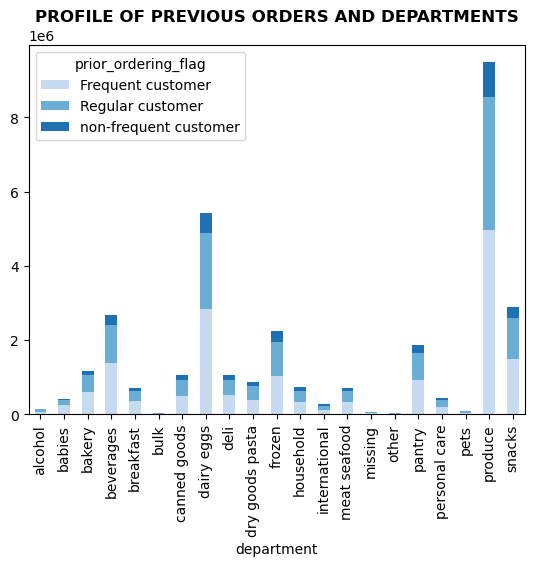

In [26]:
# Creating a stacked bar chart between spending and department
viz_stacked_bar_ordering_and_dept=ordering_and_dept.plot.bar(stacked=True,color=sns.color_palette('Blues',3))
plt.title('PROFILE OF PREVIOUS ORDERS AND DEPARTMENTS', fontweight='bold')
plt.show()

In [27]:
# Exporting Visuals
viz_stacked_bar_ordering_and_dept.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_ordering_and_dept.png'))

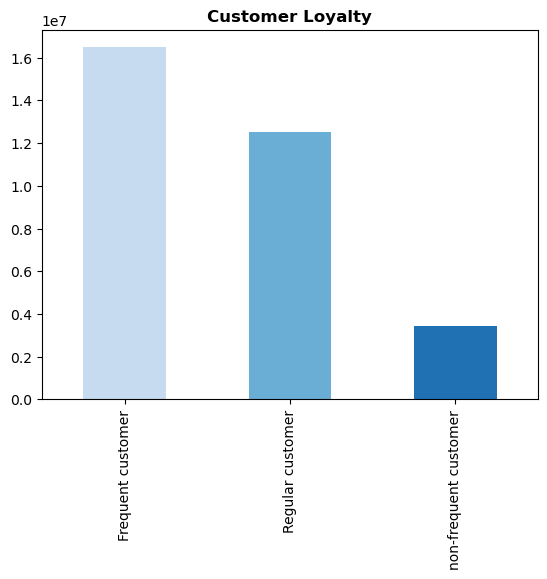

In [28]:
viz_bar_chart_loyalty=df['prior_ordering_flag'].value_counts().plot.bar(color=sns.color_palette('Blues',3))
plt.title('Customer Loyalty', fontweight='bold')
plt.show()

In [29]:
# Exporting Visuals
viz_bar_chart_loyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_chart_loyalty.png'))

In [30]:
# Creating a crosstab between ordering and flag
ordering_and_flag=pd.crosstab(df['days_since_prior_order'],df['prior_ordering_flag'],dropna=False)

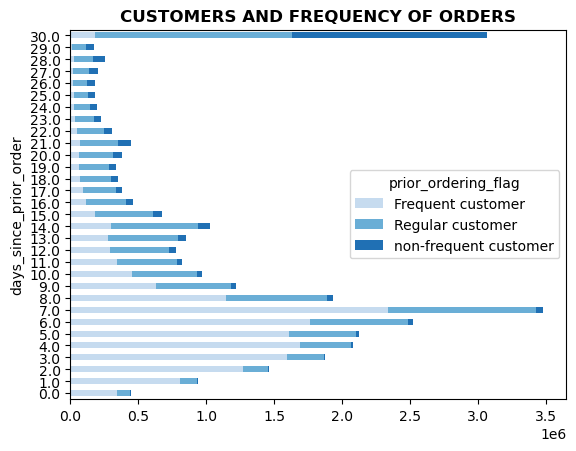

In [31]:
# Creating a stacked bar chart between spending and department
viz_stacked_bar_ordering_and_flag=ordering_and_flag.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('CUSTOMERS AND FREQUENCY OF ORDERS', fontweight='bold')
plt.show()

In [32]:
# Exporting Visuals
viz_stacked_bar_ordering_and_flag.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_ordering_and_flag.png'))

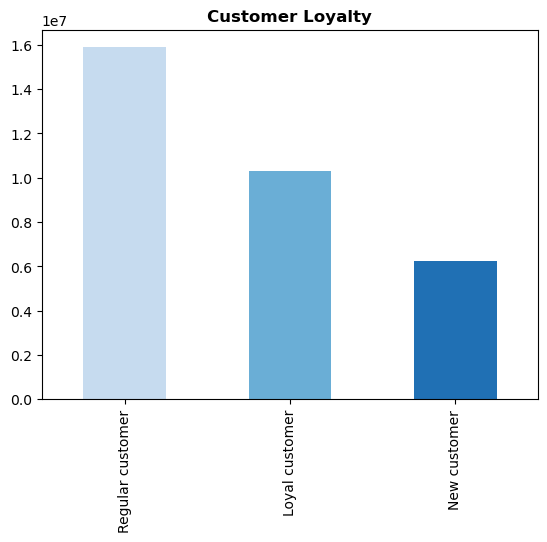

In [33]:
viz_bar_chart_loyalty_2=df['loyalty_flag'].value_counts().plot.bar(color=sns.color_palette('Blues',3))
plt.title('Customer Loyalty', fontweight='bold')
plt.show()

In [34]:
# Exporting Visuals
viz_bar_chart_loyalty_2.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_bar_chart_loyalty_2.png'))

In [35]:
# Creating a crosstab between ordering and flag
ordering_and_loyalty=pd.crosstab(df['days_since_prior_order'],df['loyalty_flag'],dropna=False)

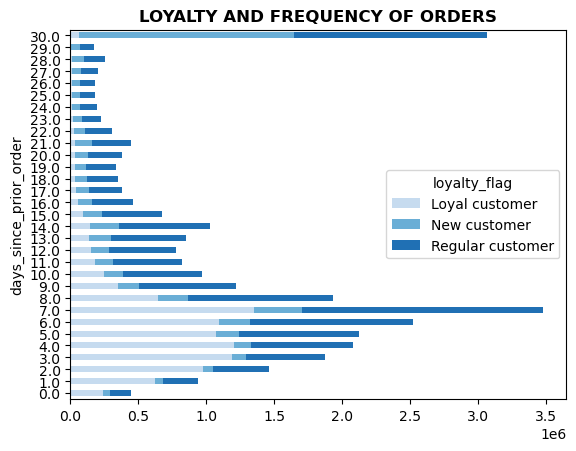

In [36]:
# Creating a stacked bar chart between spending and department
viz_stacked_bar_ordering_and_loyalty=ordering_and_loyalty.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('LOYALTY AND FREQUENCY OF ORDERS', fontweight='bold')
plt.show()

In [37]:
# Exporting visual
viz_stacked_bar_ordering_and_loyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_ordering_and_loyalty.png'))

In [38]:
# Creating a crosstab between spending and department
loyalty_and_dept=pd.crosstab(df['department'],df['loyalty_flag'],dropna=False)

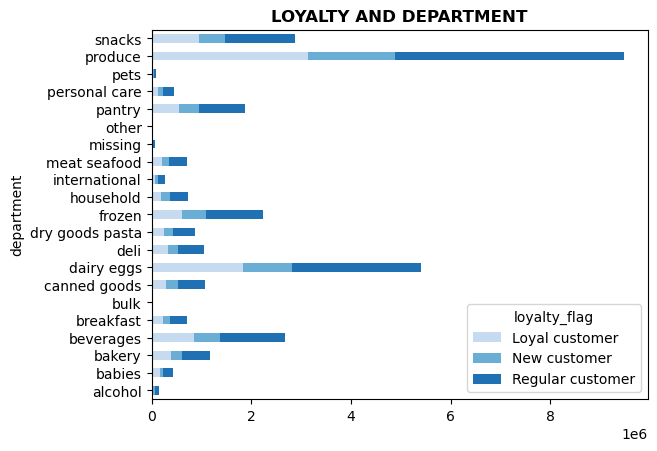

In [39]:
# Creating a stacked bar chart between loyalty and department
viz_stacked_bar_dept_and_loyalty=loyalty_and_dept.plot.barh(stacked=True,color=sns.color_palette('Blues',3))
plt.title('LOYALTY AND DEPARTMENT', fontweight='bold')
plt.show()

In [40]:
viz_stacked_bar_dept_and_loyalty.figure.savefig(os.path.join(path,'Analysis','Visualizations','viz_stacked_bar_dept_and_loyalty.png'))